In [198]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from joblib import dump

In [26]:
# 1.1

In [27]:
#Получаем данные
features=pd.read_csv('features_train.csv')
c=pd.read_csv('classes_train.csv')

In [28]:
features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,72.265781,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,4.279063,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,109,13,2,0,5,0,0,0,788,0.138325,0.016497,0.002538,0.000000,0.006345,6.500000,9,0,9,0,124
2396,5503,3,0,0,2,1,1,0,1382,3.981910,0.002171,0.000000,0.000000,0.001447,23524.000000,10,0,18,0,8
2397,2172,35504,0,2,140,1,1,0,1813,1.198014,19.583012,0.000000,0.001103,0.077220,23524.000000,15,0,16,0,130
2398,2513,19,0,0,4,1,1,0,1274,1.972527,0.014914,0.000000,0.000000,0.003140,23524.000000,14,0,17,0,95


In [29]:
classes=list(c['is_bot'])

In [31]:
#Проверяем на nan
features.isna().sum()

statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
is_default_profile                 0
is_profile_use_background_image    0
is_verified                        0
user_age                           0
tweets_freq                        0
followers_growth_rate              0
friends_growth_rate                0
favourites_growth_rate             0
listed_growth_rate                 0
followers_friends_ratio            0
screen_name_length                 0
num_digits_in_screen_name          0
length_of_name                     0
num_digits_in_name                 0
description_length                 0
dtype: int64

In [191]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(features, classes, test_size=0.5, random_state=23)

In [35]:
#Рассмотрим несколько моделей
model = GaussianNB()
model.fit(Xtrain1, Ytrain1)
y_pred = model.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred))

Accuracy:  0.9016666666666666


In [48]:
model1 = SVC()
model1.fit(Xtrain1, Ytrain1)
y_pred1 = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.7466666666666667


In [49]:
model2 = LinearSVC()
model2.fit(Xtrain1, Ytrain1)
y_pred2 = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred2))

Accuracy:  0.9733333333333334


c:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
# обучаем
model3 = DecisionTreeClassifier()
model3.fit(Xtrain1, Ytrain1)
y_pred3 = model3.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred3))

Accuracy:  0.99


In [53]:
print(confusion_matrix(Ytest1, y_pred3))
print(classification_report(Ytest1, y_pred3))

[[889   8]
 [  4 299]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       897
           1       0.97      0.99      0.98       303

    accuracy                           0.99      1200
   macro avg       0.98      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [127]:
# производим подбор оптимальных параметров для лучшей модели
parameters = {'criterion': ('gini', 'entropy'),
              'splitter':('best','random'),
                'max_depth':range(2,10),
             'min_samples_split':range(2,10)}

model3 = GridSearchCV(DecisionTreeClassifier(), parameters)
model3.fit(Xtrain1, Ytrain1)
r=model3.best_params_

In [128]:
r

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 4,
 'splitter': 'random'}

In [143]:
model2 = DecisionTreeClassifier(criterion=r['criterion'],max_depth=r['max_depth'],min_samples_split=r['min_samples_split'],splitter=r['splitter'])
model2.fit(Xtrain1, Ytrain1)

y_pred1 = model2.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9958333333333333


In [145]:
print(confusion_matrix(Ytest1, y_pred1))
print(classification_report(Ytest1, y_pred1))

[[892   5]
 [  0 303]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       897
           1       0.98      1.00      0.99       303

    accuracy                           1.00      1200
   macro avg       0.99      1.00      0.99      1200
weighted avg       1.00      1.00      1.00      1200



In [184]:
dump(model2, filename="model.pkl")

['model.pkl']

In [15]:
# 2.1

График признаков


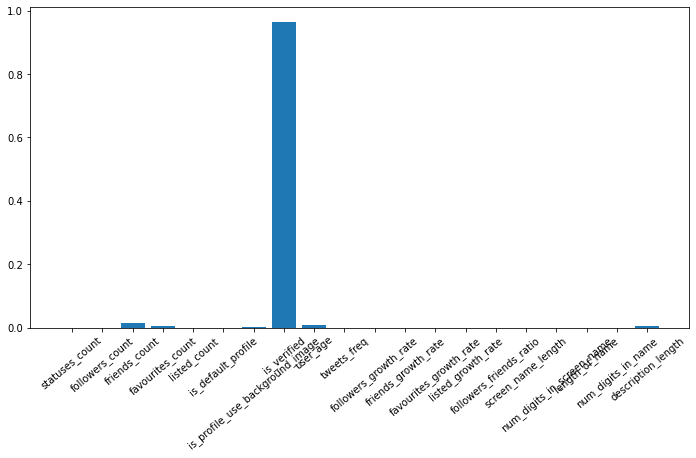

In [154]:
#Ищем наиболее важные признаки по 1 способу
import matplotlib.pyplot as plt

def cm_to_inch(value):
    return value/2.54 

model_2 = DecisionTreeClassifier(criterion=r['criterion'],max_depth=r['max_depth'],min_samples_split=r['min_samples_split'],splitter=r['splitter'])
model_2.fit(Xtrain1, Ytrain1)
importances = model_2.feature_importances_
plt.figure(figsize=(cm_to_inch(30),cm_to_inch(15)))
plt.bar(features.columns, importances)
plt.xticks(rotation=40)
print('График признаков')

In [156]:
im = np.vstack([importances, features.columns])
s={}
for i in range(0,im.shape[1]):
    s[im[1,i]]=im[0,i]
list1=sorted(s,reverse=True,key=s.get)[0:10]
print('Наиболее важные признаки')
list1

Наиболее важные признаки


['is_verified',
 'friends_count',
 'user_age',
 'description_length',
 'favourites_count',
 'is_profile_use_background_image',
 'statuses_count',
 'followers_count',
 'listed_count',
 'is_default_profile']

In [168]:
names=list(correlation_matrix.columns)
for i in list1:
    names.remove(i)
ten_features1 = features.drop(columns=names, axis=1)
ten_features1

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,73
1,10672,8465,1575,4561,191,0,1,1,4424,142
2,704,3108,454,2400,77,0,0,0,1358,90
3,6091,304528,526,599,1515,0,1,1,4214,51
4,12967,13693,204,1177,452,0,1,1,3200,106
...,...,...,...,...,...,...,...,...,...,...
2395,109,13,2,0,5,0,0,0,788,124
2396,5503,3,0,0,2,1,1,0,1382,8
2397,2172,35504,0,2,140,1,1,0,1813,130
2398,2513,19,0,0,4,1,1,0,1274,95


In [182]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(ten_features, classes, test_size=0.5, random_state=23)

In [183]:
# обучаем
model1 = DecisionTreeClassifier()
model1.fit(Xtrain1, Ytrain1)

y_pred1 = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9908333333333333


In [22]:
#Второй способ поиска 10 наиболее важных

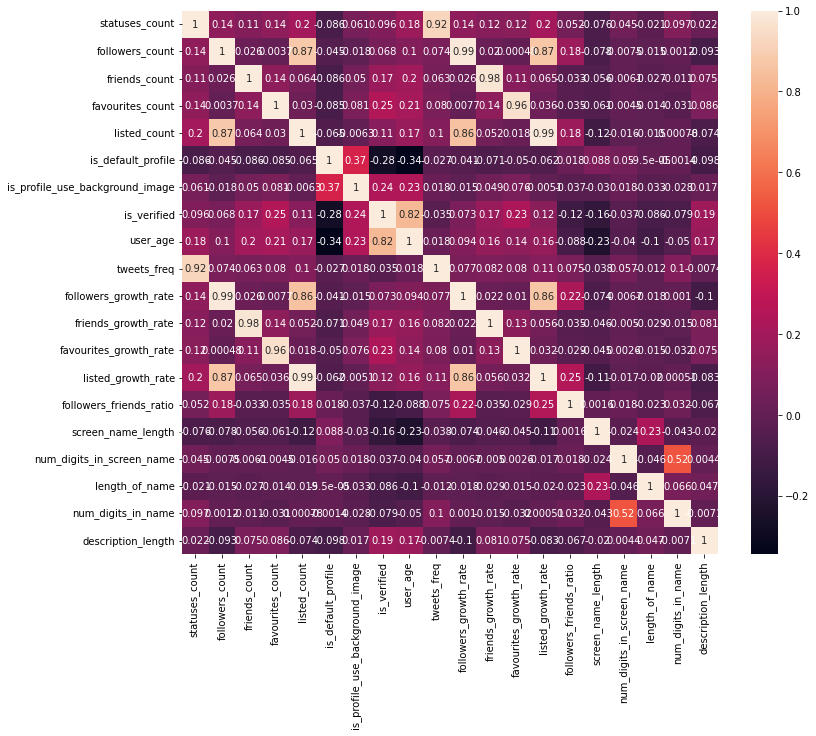

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = features.corr()

plt.figure(figsize= (12, 10))
mat=sns.heatmap(correlation_matrix, annot = True)

In [162]:
names=list(correlation_matrix.columns)

In [170]:
names=list(correlation_matrix.columns)
s,s2=correlation_matrix.shape
D={}
D2={}

for i in range(1,s-1):
    m=max(correlation_matrix[names[i-1]][i:])
    D[names[i-1]]=m
    D2[names[i-1]]=correlation_matrix[correlation_matrix[names[i-1]]==m].index.item()
        
    
list2=sorted(D,reverse=True,key=D.get)[0:5]

In [171]:
list3=list2.copy()
for i in list2:
    list3.append(D2[i])

In [172]:
for i in list3:
    names.remove(i)
# удаляем признаки, которые слабо коррелируют между собой
ten_features2 = features.drop(columns=names, axis=1)

In [173]:
ten_features2

,statuses_count,followers_count,friends_count,favourites_count,listed_count,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate
0,5124,6641,3074,13768,126,1.890077,2.449650,1.133899,5.078569,0.046477
1,10672,8465,1575,4561,191,2.412297,1.913427,0.356013,1.030967,0.043174
2,704,3108,454,2400,77,0.518409,2.288660,0.334315,1.767305,0.056701
3,6091,304528,526,599,1515,1.445420,72.265781,0.124822,0.142145,0.359516
4,12967,13693,204,1177,452,4.052187,4.279063,0.063750,0.367812,0.141250
...,...,...,...,...,...,...,...,...,...,...
2395,109,13,2,0,5,0.138325,0.016497,0.002538,0.000000,0.006345
2396,5503,3,0,0,2,3.981910,0.002171,0.000000,0.000000,0.001447
2397,2172,35504,0,2,140,1.198014,19.583012,0.000000,0.001103,0.077220
2398,2513,19,0,0,4,1.972527,0.014914,0.000000,0.000000,0.003140


In [179]:
# разделяем на тестовые и тренировочные данные
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(ten_features2, classes, test_size=0.5, random_state=23)

In [181]:
# обучаем
model1 = DecisionTreeClassifier()
model1.fit(Xtrain1, Ytrain1)

# предсказываем для тестового набора
y_pred1 = model1.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9775


In [ ]:
#Таким образом первый способ отбора параметров сработал лучше.